# Alpha-Beta-Pruning

In [20]:
from IPython.display import Image, display

from algo_viz.algorithm import *
from algo_viz.utility import *
from algo_viz.tree_builder import *
from algo_viz.visualizer import *

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Without builder for graph

{ 
   AAA: {'value': 10, 'alpha': 0, 'beta': 0}
   AA: {'value': 10, 'alpha': 10, 'beta': inf}
   AAB: {'value': 8, 'alpha': 0, 'beta': 0}
   A: {'value': 10, 'alpha': -inf, 'beta': 10}
   ABA: {'value': 7, 'alpha': 0, 'beta': 0}
   AB: {'value': 12, 'alpha': 12, 'beta': 10}
   ABB: {'value': 12, 'alpha': 0, 'beta': 0}
   X: {'value': 10, 'alpha': 10, 'beta': inf}
   BAA: {'value': 9, 'alpha': 0, 'beta': 0}
   BA: {'value': 9, 'alpha': 10, 'beta': inf}
   BAB: {'value': 6, 'alpha': 0, 'beta': 0}
   B: {'value': 9, 'alpha': 10, 'beta': 9}
}


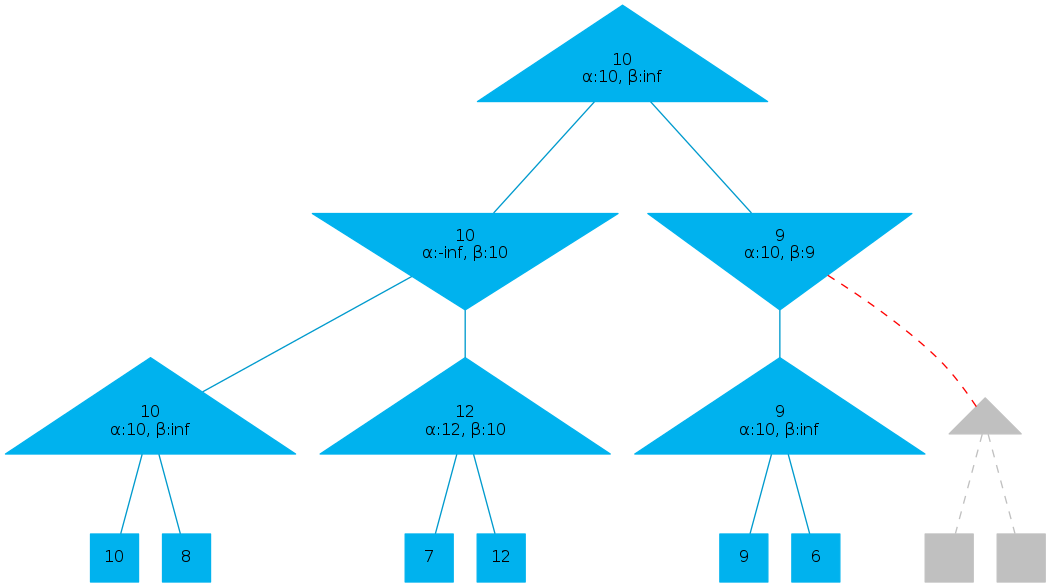

In [22]:
graph = {
    # 1. Layer
    'X': ['A', 'B'],  
    # 2. Layer
    'A': ['AA', 'AB'],  
    'B': ['BA', 'BB'],
    # 3. Layer
    'AA': ['AAA','AAB'],
    'AB': ['ABA','ABB'],
    'BA': ['BAA','BAB'],
    'BB': ['BBA','BBB'],  
    #4. Layer
    'AAA': 10,
    'AAB': 8,
    'ABA': 7,
    'ABB': 12,
    'BAA': 9,
    'BAB': 6,
    'BBA': 4,
    'BBB': 17,
}
desc = alpha_beta(graph)
print_pretty(desc)
digraph = build_viz(graph.keys(), graph, desc, branching=2)
digraph.render(filename='img/graph')
display(Image(filename='img/graph.png'))


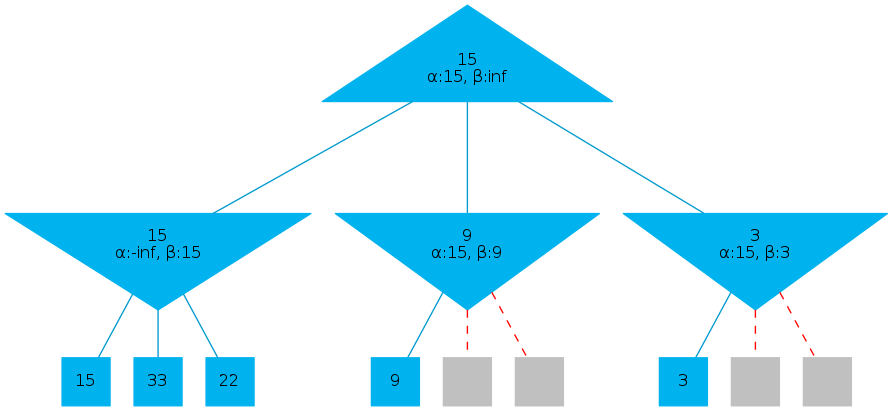

In [5]:
graphx3 = {
     # 1. Layer
    'X': ['A', 'B', 'C'],  
    # 2. Layer
    'A': ['AA', 'AB', 'AC'],  
    'B': ['BA', 'BB', 'BC'],
    'C': ['CA', 'CB', 'CC'],
    # 3. Layer
    'AA': 15,
    'AB': 33,
    'AC': 22,
    'BA': 9,
    'BB': 4,
    'BC': 9,
    'CA': 3,
    'CB': 1,
    'CC': 2,   
}
desc = alpha_beta(graphx3)
digraph = build_viz(graphx3.keys(), graphx3, desc, branching=3)
digraph.render(filename='img/graphx3')
display(Image(filename='img/graphx3.png'))

## With builder for graph

In [17]:
nums = build_random_leafs(depth=4, branching=2)

{ 
   X: ['X0', 'X1']
   X0: ['X00', 'X01']
   X1: ['X10', 'X11']
   X00: ['X000', 'X001']
   X01: ['X010', 'X011']
   X10: ['X100', 'X101']
   X11: ['X110', 'X111']
   X000: ['X0000', 'X0001']
   X001: ['X0010', 'X0011']
   X010: ['X0100', 'X0101']
   X011: ['X0110', 'X0111']
   X100: ['X1000', 'X1001']
   X101: ['X1010', 'X1011']
   X110: ['X1100', 'X1101']
   X111: ['X1110', 'X1111']
   X0000: 30
   X0001: 31
   X0010: 39
   X0011: -54
   X0100: -86
   X0101: -41
   X0110: 17
   X0111: -62
   X1000: 87
   X1001: 75
   X1010: 17
   X1011: -75
   X1100: -20
   X1101: 51
   X1110: 37
   X1111: -29
}


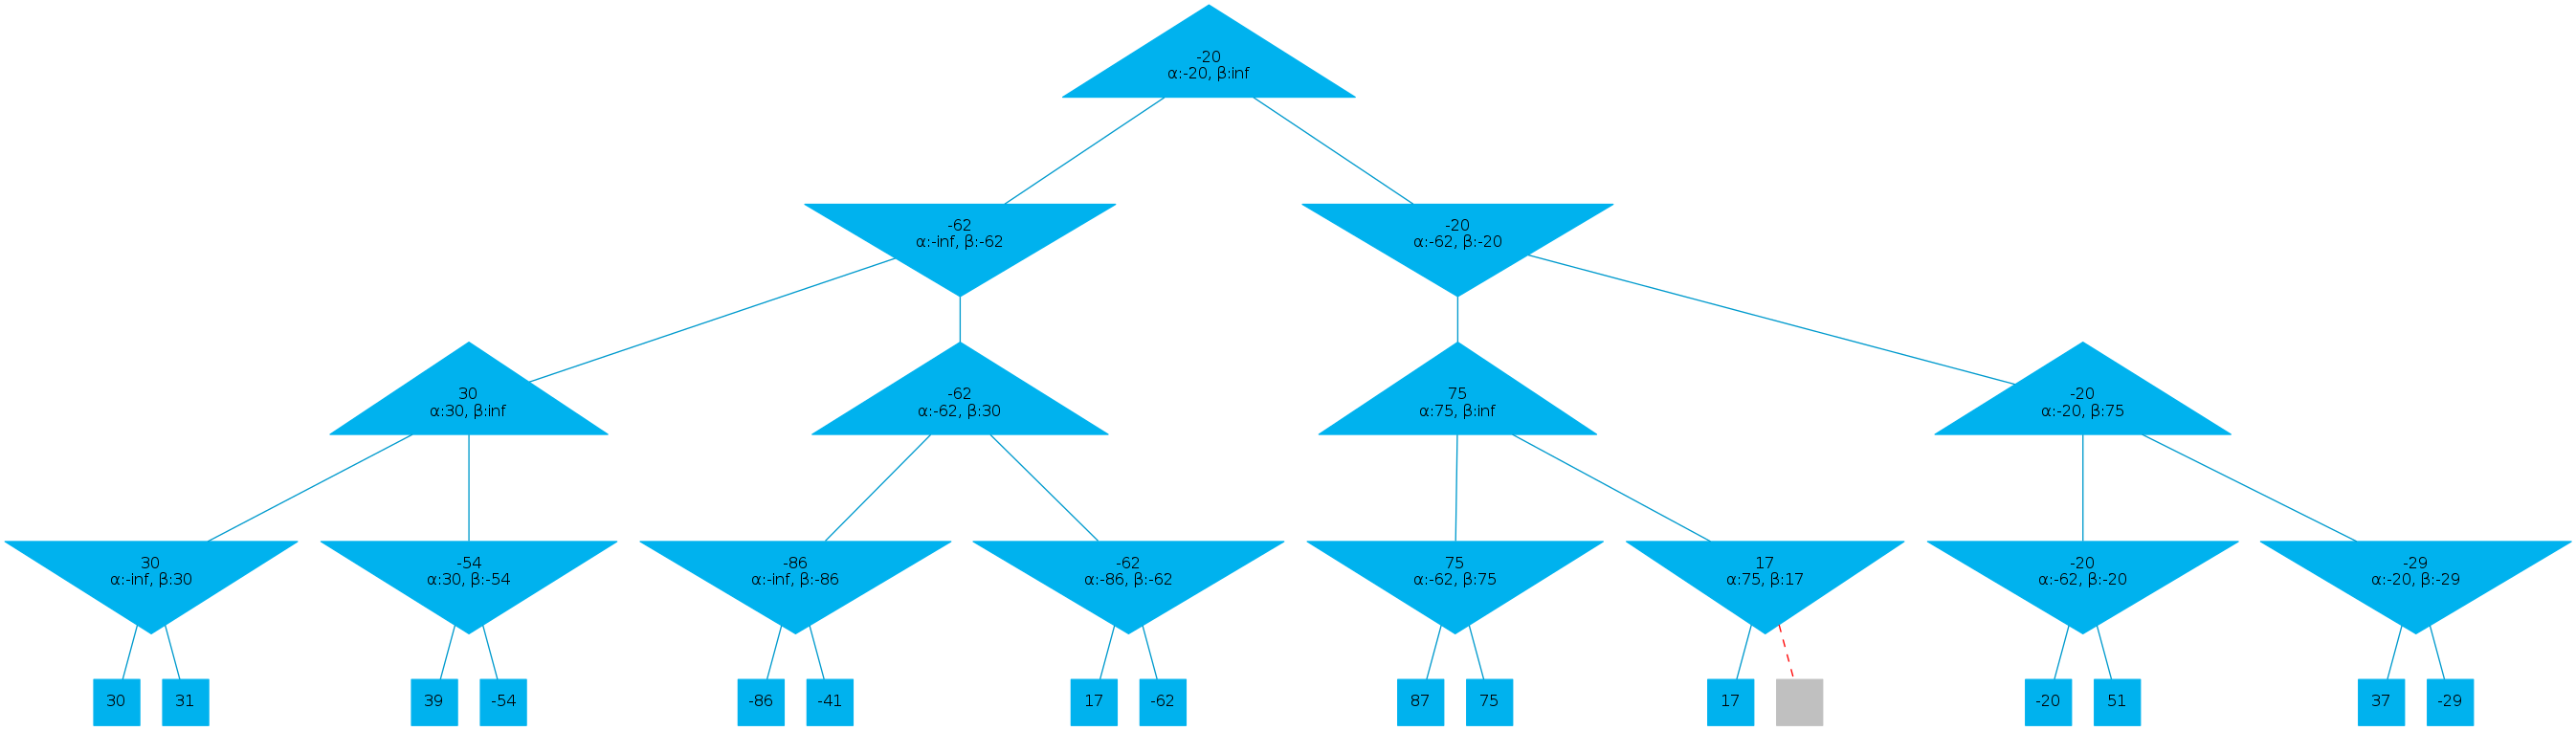

In [18]:
order, graphB3 = build_graph(nums, branching=2)
print_pretty(graphB3, order)

desc = alpha_beta(graphB3, root=order[0])

viz = build_viz(order, graphB3, desc, branching=2)

viz.render(filename='img/graphB3')
display(Image(filename='img/graphB3.png'))


{ 
   X: ['X0', 'X1']
   X0: ['X00', 'X01']
   X1: ['X10', 'X11']
   X00: ['X000', 'X001']
   X01: ['X010', 'X011']
   X10: ['X100', 'X101']
   X11: ['X110', 'X111']
   X000: ['X0000', 'X0001']
   X001: ['X0010', 'X0011']
   X010: ['X0100', 'X0101']
   X011: ['X0110', 'X0111']
   X100: ['X1000', 'X1001']
   X101: ['X1010', 'X1011']
   X110: ['X1100', 'X1101']
   X111: ['X1110', 'X1111']
   X0000: 87
   X0001: 75
   X0010: 51
   X0011: 39
   X0100: 37
   X0101: 31
   X0110: 30
   X0111: 17
   X1000: 17
   X1001: -20
   X1010: -29
   X1011: -41
   X1100: -54
   X1101: -62
   X1110: -75
   X1111: -86
}


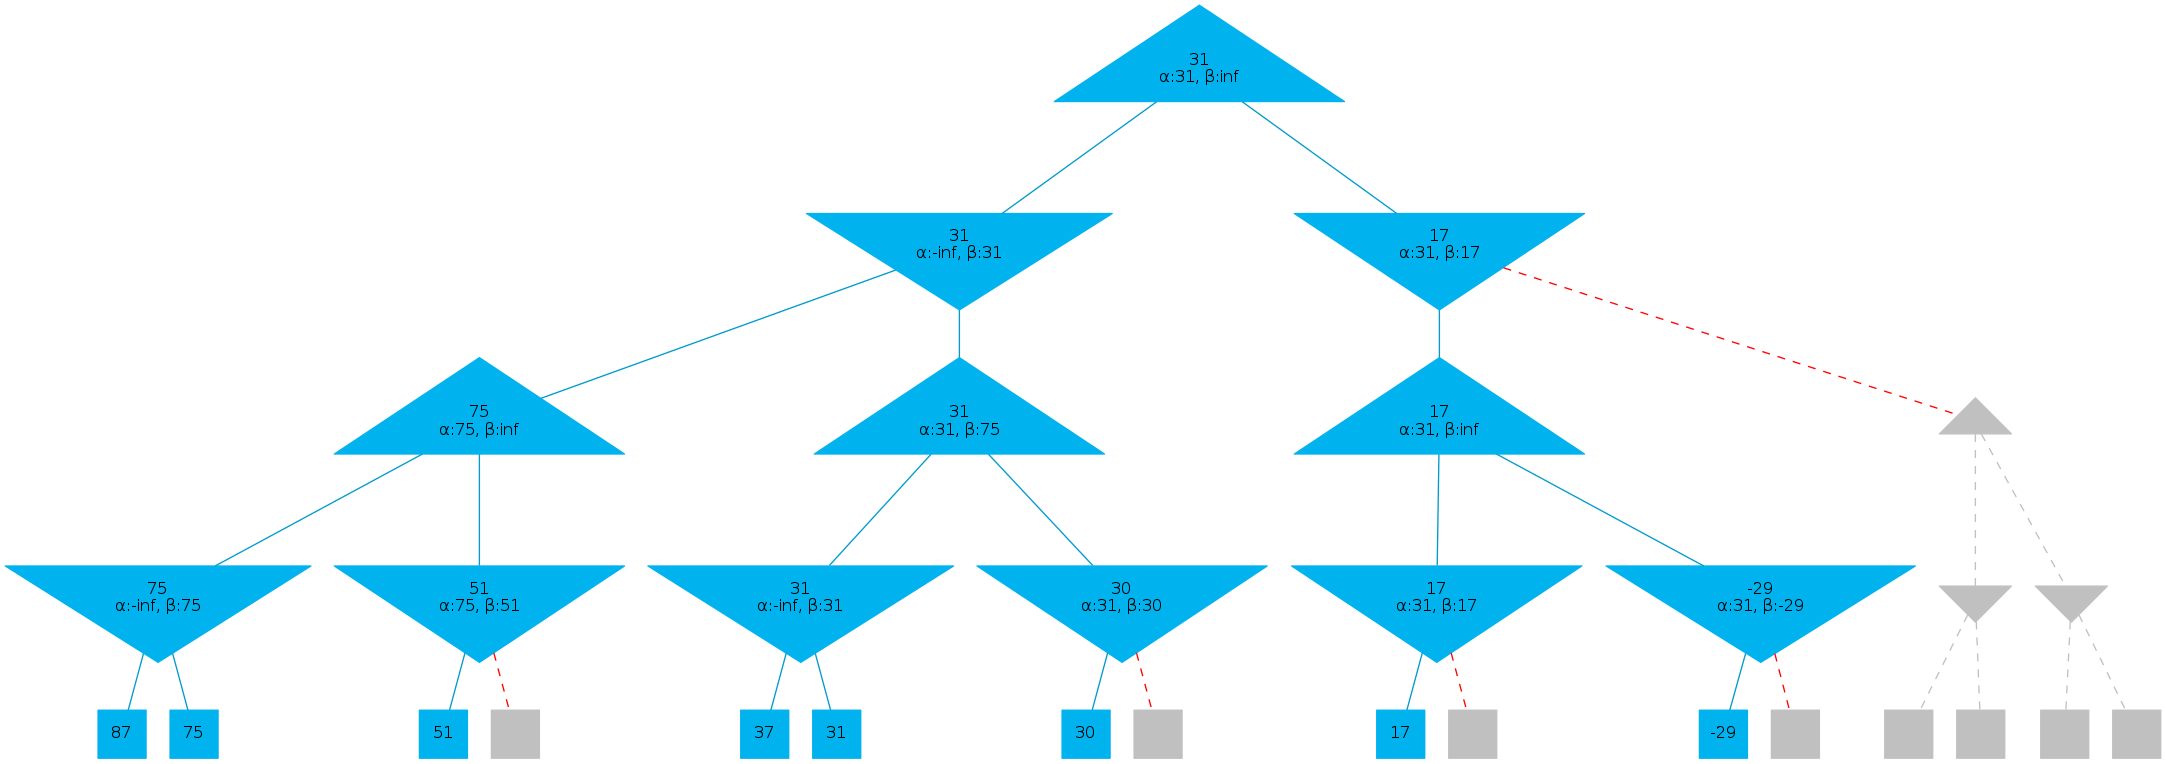

In [19]:
sorted_nums = sorted(nums, reverse=True)
order, graphB3 = build_graph(sorted_nums, branching=2)
print_pretty(graphB3, order)

desc = alpha_beta(graphB3, root=order[0])

viz = build_viz(order, graphB3, desc, branching=2)

viz.render(filename='img/graphB3')
display(Image(filename='img/graphB3.png'))
